In [1]:
from hkvpy.fews import pi, dataportal
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# get the locations as a geojson from the fewspiservice
piService = 'http://www.oms-waddenzee.nl:8081/FewsPiService/fewspiservice?wsdl'
pi.setClient(wsdl = piService)

In [3]:
vars(pi.getFilters())

{'f_werk': {'description': '',
  'id': 'f_werk',
  'name': 'Uitgevoerde werkzaamheden + peilingen'},
 'f_werk_1': {'description': '',
  'id': 'f_werk.1',
  'name': 'Baggeren + Zandwinning + Agiteren (/baggervak)'},
 'f_werk_2': {'description': '',
  'id': 'f_werk.2',
  'name': 'Verspreiden (/verspreidingsvak)'}}

In [4]:
pi.Filters.f_werk_1['id']

'f_werk.1'

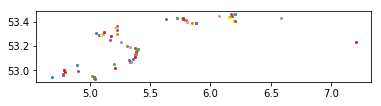

In [5]:
filterId = pi.Filters.f_werk_1['id']#'f_werk.1'#'f_werk.1' 
piVersion = '1.22'
gdf = pi.getLocations(filterId=filterId, piVersion=piVersion, setFormat='gdf')
locationIds = gdf.locationId.tolist()

gdf.geometry.plot()

In [6]:
pi.Locations.bv_1_7_1_1

{'lat': '52.982583581934826',
 'locationId': 'bv.1.7.1.1',
 'lon': '4.789939580471975',
 'shortName': 'Den Helder - Texel, Vaarweg',
 'x': '114887.0',
 'y': '555232.0'}

In [8]:
startTime = datetime(2017,1,2,1,0,0,0, tzinfo=pi.utils.utc_offset(0*60*60))
endTime =  datetime(2017,6,11,2,0,0,0, tzinfo=pi.utils.utc_offset(0*60*60))
parameterIds = ['k.m3.gebaggerd.vdlee']#,'k.m3.verspreid.vdlee']
#moduleInstanceIds = ['pr.Reizen.vdLee.baggeracties']#,'pr.Reizen.vdLee.verspreidingsacties']
print (locationIds)

['bv.1.7.1.1', 'bv.1.7.1.1.1.1', 'bv.1.7.1.1.1.2', 'bv.1.7.1.1.1.3', 'bv.1.7.1.1.2.1', 'bv.1.7.1.1.2.2', 'bv.1.7.1.1.2.3', 'bv.1.7.1.1.2.4', 'bv.1.7.1.1.2.5', 'bv.1.7.1.1.2.6', 'bv.1.7.1.2', 'bv.1.7.1.3.1', 'bv.1.7.1.3.1.A', 'bv.1.7.1.3.1.B', 'bv.1.7.1.3.2.1', 'bv.1.7.1.3.2.2', 'bv.1.7.1.3.2.3', 'bv.1.7.1.3.2.4', 'bv.1.7.1.3.2.5', 'bv.1.7.1.3.2.6', 'bv.1.7.1.3.2.7', 'bv.1.7.1.3.2.8', 'bv.1.7.1.4.1.1', 'bv.1.7.1.4.1.2', 'bv.1.7.1.4.1.3', 'bv.1.7.1.4.1.4', 'bv.1.7.1.4.1.5', 'bv.1.7.1.4.2', 'bv.1.7.1.4.A', 'bv.1.7.1.4.B', 'bv.1.7.1.4.C', 'bv.1.7.1.5.1.A', 'bv.1.7.1.5.1.B', 'bv.1.7.1.5.1.C', 'bv.1.7.1.5.1.D', 'bv.1.7.1.5.1.E', 'bv.1.7.1.5.1.F', 'bv.1.7.1.5.1.G', 'bv.1.7.1.5.1.H', 'bv.1.7.1.5.1.I', 'bv.1.7.1.5.1.J', 'bv.1.7.1.5.1.K', 'bv.1.7.1.5.1.L', 'bv.1.7.1.5.1.M', 'bv.1.7.1.5.1.N', 'bv.1.7.1.5.1.O', 'bv.1.7.1.5.2', 'bv.1.7.1.5.3', 'bv.1.7.2.1.1', 'bv.1.7.2.1.1.A', 'bv.1.7.2.1.1.B', 'bv.1.7.2.1.2.1', 'bv.1.7.2.1.2.2', 'bv.1.7.2.2.1', 'bv.1.7.2.2.1.A', 'bv.1.7.2.2.1.B', 'bv.1.7.2.2.2.1',

In [9]:
df, entry = pi.getTimeSeries(filterId, parameterIds, locationIds,startTime,endTime, setFormat='df')

In [10]:
# method to get year/week labels with an sum aggregation
df['value'].replace(-999.0,np.NaN, inplace = True)
kw = lambda x: x.isocalendar()[1]; 
kw_year = lambda x: str(x.year) + ' - ' + str(x.isocalendar()[1])
level_values = df.index.get_level_values
grouped = (df.groupby([level_values(i) for i in [1,2,3,4,5]]+[level_values(0).map(kw_year)], sort=False,as_index=True ).agg({'value': 'sum'}))
grouped.index.rename(names='date', level=5, inplace=True)
groupedJSON = grouped.reset_index().to_json(orient='records', date_format='iso')

In [11]:
grouped

value
moduleId                     parameterId          units locationId       stationName                                        date              
pr.Reizen.vdLee.baggeracties k.m3.gebaggerd.vdlee m3    bv.1.7.1.1       Den Helder - Texel, Vaarweg                        2017 - 1       NaN
                                                        bv.1.7.1.1.1.1   Den Helder veerhaven, Vak A                        2017 - 1       NaN
                                                        bv.1.7.1.1.1.2   Den Helder veerhaven, Vak B                        2017 - 1       NaN
                                                        bv.1.7.1.1.1.3   Den Helder veerhaven, Vak C                        2017 - 1       NaN
                                                        bv.1.7.1.1.2.1   Texel veerhaven, Vak A                             2017 - 1       NaN
                                                        bv.1.7.1.1.2.2   Texel veerhaven, Vak B                             2017 - 1       NaN
                                                        bv.1.7.1.1.2.3   Texel veerhaven, Vak C                             2017 - 1       NaN
                                                        bv.1.7.1.1.2.4   Texel veerhaven, Vak D                             2017 - 1       NaN
                                                        bv.1.7.1.1.2.5   Texel veerhaven, Vak E                             2017 - 1       NaN
                                                        bv.1.7.1.1.2.6   Texel veerhaven, Vak F                             2017 - 1       NaN
                                                        bv.1.7.1.2       Den Helder - Noordzee                              2017 - 1       NaN
                                                        bv.1.7.1.3.1     Visjagersgaatje                                    2017 - 1       NaN
                                                        bv.1.7.1.3.1.A   Den Helder - Den Oever, Malzwin                    2017 - 1       NaN
                                                        bv.1.7.1.3.1.B   Den Helder - Den Oever, Visjagersgaatje -Den Oever 2017 - 1       NaN
                                                        bv.1.7.1.3.2.1   Den Oever, Toegangsgeul                            2017 - 1       NaN
                                                        bv.1.7.1.3.2.2   Den Oever, Buitenhaven                             2017 - 1   2930.55
                                                        bv.1.7.1.3.2.3   Den Oever, Voorhaven                               2017 - 1       NaN
                                                        bv.1.7.1.3.2.4   Den Oever, Noorderhaven                            2017 - 1       NaN
                                                        bv.1.7.1.3.2.5   Den Oever, Waddenhaven                             2017 - 1       NaN
                                                        bv.1.7.1.3.2.6   Den Oever, Vissershaven                            2017 - 1       NaN
                                                        bv.1.7.1.3.2.7   Den Oever, Bodem bij remmingwerken / steiger       2017 - 1       NaN
                                                        bv.1.7.1.3.2.8   Den Oever, Bodem bij beweegbare brug / sluis       2017 - 1       NaN
                                                        bv.1.7.1.4.1.1   Kornwerderzand, Toegangsgeul                       2017 - 1       NaN
                                                        bv.1.7.1.4.1.2   Kornwerderzand, Buitenhaven                        2017 - 1    580.56
                                                        bv.1.7.1.4.1.3   Kornwerderzand, Voorhaven                          2017 - 1   2777.77
                                                        bv.1.7.1.4.1.4   Kornwerderzand, Bodem bij remmingwerken / steiger  2017 - 1       NaN
                                                        bv.1.7.1.4.1.5   Kornwerderzand, Bodem bij beweegbare brug / sluis  2017 - 1 

In [12]:
stacked = pd.read_json(groupedJSON)
#stacked['value'].replace(-999.0,np.NaN, inplace=True)

In [13]:
stacked.head()

,date,locationId,moduleId,parameterId,stationName,units,value
0,2017 - 1,bv.1.7.1.1,pr.Reizen.vdLee.baggeracties,k.m3.gebaggerd.vdlee,"Den Helder - Texel, Vaarweg",m3,NaN
1,2017 - 1,bv.1.7.1.1.1.1,pr.Reizen.vdLee.baggeracties,k.m3.gebaggerd.vdlee,"Den Helder veerhaven, Vak A",m3,NaN
2,2017 - 1,bv.1.7.1.1.1.2,pr.Reizen.vdLee.baggeracties,k.m3.gebaggerd.vdlee,"Den Helder veerhaven, Vak B",m3,NaN
3,2017 - 1,bv.1.7.1.1.1.3,pr.Reizen.vdLee.baggeracties,k.m3.gebaggerd.vdlee,"Den Helder veerhaven, Vak C",m3,NaN
4,2017 - 1,bv.1.7.1.1.2.1,pr.Reizen.vdLee.baggeracties,k.m3.gebaggerd.vdlee,"Texel veerhaven, Vak A",m3,NaN


In [14]:
import geopandas as gpd

In [ ]:
shp = r'D:\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken//Baggervakken.shp'
gdf = gpd.

In [35]:
np.unique(stacked.moduleId), stacked.shape

(array(['pr.Reizen.vdLee.baggeracties'], dtype=object), (2400, 7))

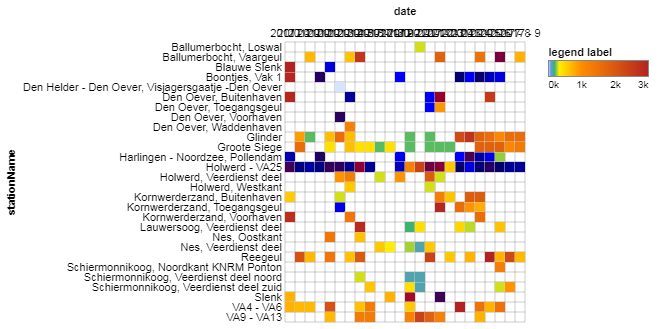

In [13]:
from altair import *
# Define a custom colormape using Hex codes & HTML color names
colormap = Scale(domain=['nan', 0, 100, 200, 350, 1000, 3000],
                 range=['white', '#F0F8FF', 'cornflowerblue',
                        'mediumseagreen', '#FFEE00', 'darkorange', 'firebrick'])

# Define our chart with aesthetic customizations
chart = Chart(stacked).mark_text(
    applyColorToBackground=True,
).encode(
    Column('date'),#,axis=Axis(values=date_axes_values, title=' ')),
    Row('stationName'),# axis=Axis(title='location')),
    Color('sum(value)', scale=colormap,
          legend=Legend(title='legend label',
                        values=[0, 1000, 2000, 3000])),
    Text(value=' ')
).configure_scale(
    textBandWidth=10,
    bandSize=10
)

json = chart.to_dict()

Chart.from_dict(json).display()
#chart2.display()

In [36]:
#set HKV database
import requests
import json

In [37]:
# Create database
url = r'http://85.17.82.66/dataservices/database.asmx/create?database=OMSWaddenzee'
r = requests.get(url)
json.loads(r.content.decode('utf-8'))

{'exception': 'database name already exists'}

In [38]:
# Check database version
url = r'http://85.17.82.66/dataservices/database.asmx/version?database=OMSWaddenzee'
r = requests.get(url)
json.loads(r.content.decode('utf-8'))

{'database': 'OMSWaddenzee',
 'date': '2017-06-23 22:18:35',
 'version': '0.2.0.0'}

In [20]:
import zeep
client = zeep.Client(wsdl='http://85.17.82.66/dataservices/data.asmx?WSDL')
client.wsdl.dump()


Prefixes:
     ns0: http://tempuri.org/
     xsd: http://www.w3.org/2001/XMLSchema

Global elements:
     ns0:create(database: xsd:string, key: xsd:string, description: xsd:string, data: xsd:string)
     ns0:createResponse(createResult: xsd:string)
     ns0:delete(database: xsd:string, key: xsd:string)
     ns0:deleteResponse()
     ns0:list(database: xsd:string)
     ns0:listResponse()
     ns0:read(database: xsd:string, key: xsd:string)
     ns0:readResponse()
     ns0:string(xsd:string)
     ns0:update(database: xsd:string, key: xsd:string, description: xsd:string, data: xsd:string)
     ns0:updateResponse(updateResult: xsd:string)
     

Global types:
     xsd:anyType
     xsd:ENTITIES
     xsd:ENTITY
     xsd:ID
     xsd:IDREF
     xsd:IDREFS
     xsd:NCName
     xsd:NMTOKEN
     xsd:NMTOKENS
     xsd:NOTATION
     xsd:Name
     xsd:QName
     xsd:anySimpleType
     xsd:anyURI
     xsd:base64Binary
     xsd:boolean
     xsd:byte
     xsd:date
     xsd:dateTime
     xsd:decimal
  

In [21]:
groupedJSON

'[{"moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.gebaggerd.vdlee","units":"m3","locationId":"bv.1.7.1.1","stationName":"Den Helder - Texel, Vaarweg","date":"2017 - 1","value":null},{"moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.gebaggerd.vdlee","units":"m3","locationId":"bv.1.7.1.1.1.1","stationName":"Den Helder veerhaven, Vak A","date":"2017 - 1","value":null},{"moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.gebaggerd.vdlee","units":"m3","locationId":"bv.1.7.1.1.1.2","stationName":"Den Helder veerhaven, Vak B","date":"2017 - 1","value":null},{"moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.gebaggerd.vdlee","units":"m3","locationId":"bv.1.7.1.1.1.3","stationName":"Den Helder veerhaven, Vak C","date":"2017 - 1","value":null},{"moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.gebaggerd.vdlee","units":"m3","locationId":"bv.1.7.1.1.2.1","stationName":"Texel veerhaven, Vak A","date":"2017 - 1","value":null},{"moduleId":

In [19]:
zeep_out = client.service.create('OMSWaddenzee', 'piTimeSeries',groupedJSON)
json.loads(zeep_out)

JSONDecodeError: Invalid control character at: line 1 column 44 (char 43)

In [39]:
# Get data after create datarecord
url = r'http://85.17.82.66/dataservices/data.asmx/read?database=OMSWaddenzee&key=piTimeSeries'
r = requests.get(url)
stacked = json.loads(r.content.decode('utf-8'))

In [40]:
stacked[0]

KeyError: 0

In [ ]:
# OTHER POSSIBLE QUERIES

In [ ]:
# Update (replace) data for datarecord
zeep_out = client.service.update('example', 'example_key','[11,10,9,8,7,6,5,4,3,2,1]')
json.loads(zeep_out)

In [ ]:
# Get data after update datarecord
url = r'http://85.17.82.66/dataservices/data.asmx/read?database=example&key=example_key'
r = requests.get(url)
json.loads(r.content)

In [ ]:
# delete data from database
url = r'http://85.17.82.66/dataservices/data.asmx/delete?database=example&key=example_key'
r = requests.get(url)
json.loads(r.content)

In [ ]:
grouped = (stacked
    .groupby('stationName')                
    .apply(lambda g:               # work on groups of col1
        g.set_index('date')        
        [['value']]
        .resample('W').sum()  # sum the amount field across weeks
    )
    .unstack(level=0)              # pivot the col1 index rows to columns
    .fillna(0)
)
grouped.columns=grouped.columns.droplevel()   # drop the 'col1' part of the multi-index column names
#print (grouped.head)
grouped.plot(kind='bar')

In [ ]:
grouped.head()

In [ ]:
#stacked.date = stacked.date.astype(np.int64) // 10**9
#stacked.date = stacked.date.dt.strftime('%Y%m%d')

In [ ]:
# webquery for all locations

In [ ]:
# webquery for timeseries for selection with 2 locations

In [ ]:
# webquery for timeseries for all locations

In [ ]:
# VEGA utils
# number of datetime items to display as labels
labelNo = 4

l = stacked.date.tolist()
n = int(len(l) / labelNo)
chunks = [l[i:i + n] for i in range(0, len(l), n)]
date_axes_values = []
for chunk in chunks:    
    date_axes_values.append(chunk[0])#.timestamp()))

In [ ]:
# 

# Chart(stacked).mark_text(
#     applyColorToBackground=True
# ).encode(
#     row='stationName',
#     column='date',
#     color='mean(value)',
#     text='mean(value)'
# )